# Regressão Múltipla / Transformações em X e y

In [1]:
import statsmodels.formula.api as smf
from seaborn import load_dataset
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import patsy

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [2]:

tips = load_dataset("tips")

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

tips['net_bill'] = tips['total_bill'] - tips['tip']


In [3]:
# item 1

y, X = patsy.dmatrices('tip ~ sex + smoker + C(time) + net_bill', tips[:3])


In [4]:
# Matriz de Design

X


DesignMatrix with shape (3, 5)
  Intercept  sex[T.Female]  smoker[T.No]  C(time)[T.Dinner]  net_bill
          1              1             1                  1     15.98
          1              0             1                  1      8.68
          1              0             1                  1     17.51
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'C(time)' (column 3)
    'net_bill' (column 4)

In [5]:
# Matriz y

y


DesignMatrix with shape (3, 1)
   tip
  1.01
  1.66
  3.50
  Terms:
    'tip' (column 0)

In [6]:
# Usando a Regressão Inicial para os próximos itens
 
reg_tips = smf.ols('tip ~ sex + smoker + C(time) + net_bill', data = tips).fit()

tips['res_log'] = reg_tips.resid

reg_tips.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           2.64e-20
Time:                        08:22:06   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]        -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]          0.1405      0.151      0.932      0.352      -0.156       0.437
C(time)[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill              0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           5.02e-23
Time:                        08:22:10   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

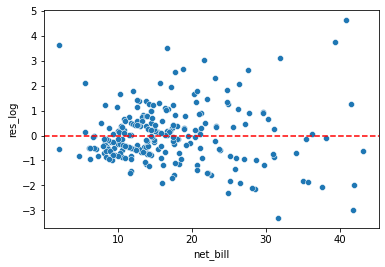

In [7]:
# item (2 e 3)

# Tirando as variaveis: sex[T.Female], smoker[T.No] e C(time)[T.Dinner] e construindo o Gráfico de Resíduo em Função do net_bill

reg_tips = smf.ols('tip ~ net_bill', data = tips).fit()

tips['res_log'] = reg_tips.resid

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)

plt.axhline(y=0, color='r', linestyle='--')

reg_tips.summary()


In [8]:
# item 4

# testando transformar net_bill em log

# 1(modelo)

reg_tips = smf.ols('tip ~ np.log(net_bill)', data = tips).fit()

tips['res_log'] = reg_tips.resid

reg_tips.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           4.40e-20
Time:                        08:22:24   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# testando transformar net_bill em polinômio do segundo grau

# 2(modelo)

reg_tips = smf.ols('tip ~ np.power(net_bill,2)', data = tips).fit()

tips['res_log'] = reg_tips.resid

reg_tips.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           1.47e-20
Time:                        08:22:27   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2566      0.104     21.720      0.000       2.052       2.461
np.power(net_bill, 2)     0.0021      0.000     10.202      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.756   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.466
Skew:                           0.620   Prob(JB):                     1.47e-07
Kurtosis:                       4.248   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:

# 1(modelo) --> A transformações logaritmica apresentou: R-squared = 0.294

# 2(modelo) --> A transformações quadrática(polinomio do segundo grau) apresentou: R-squared = 0.301

# Melhor modelo: 2(modelo)


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [10]:
# item 1

y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + C(time) + net_bill', tips[:3])


In [11]:

X


DesignMatrix with shape (3, 5)
  Intercept  sex[T.Female]  smoker[T.No]  C(time)[T.Dinner]  net_bill
          1              1             1                  1     15.98
          1              0             1                  1      8.68
          1              0             1                  1     17.51
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'C(time)' (column 3)
    'net_bill' (column 4)

In [12]:

y


DesignMatrix with shape (3, 1)
  np.log(tip)
      0.00995
      0.50682
      1.25276
  Terms:
    'np.log(tip)' (column 0)

In [13]:
# Regressão Inicial 

reg_tips = smf.ols('np.log(tip) ~ sex + smoker + C(time) + net_bill', data = tips).fit()

tips['res_log'] = reg_tips.resid

reg_tips.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           1.21e-18
Time:                        08:22:42   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]         0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]          0.0436      0.048      0.903      0.367      -0.052       0.139
C(time)[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill              0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           2.60e-21
Time:                        08:22:46   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

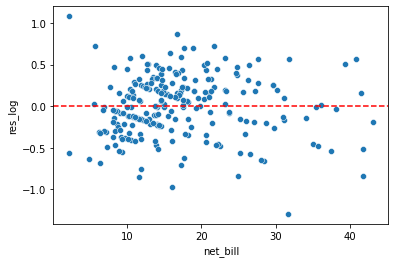

In [14]:
# item 2 e 3

# Tirando as variaveis estatisticamente não significativas e construindo o Gráfico de Resíduo em Função do net_bill

reg_tips = smf.ols('np.log(tip) ~ net_bill', data = tips).fit()

tips['res_log'] = reg_tips.resid

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)

plt.axhline(y=0, color='r', linestyle='--')

reg_tips.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           5.62e-22
Time:                        08:22:51   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

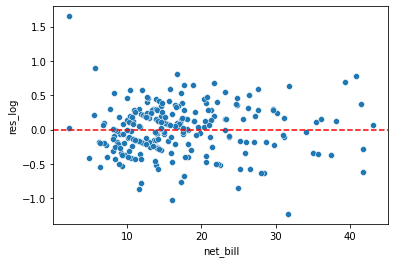

In [15]:
# item 4

# Transformando o net_bill em log

# 1(modelo)

reg_tips = smf.ols('np.log(tip) ~ np.log(net_bill)', data = tips).fit()

tips['res_log'] = reg_tips.resid

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)

plt.axhline(y=0, color='r', linestyle='--')

reg_tips.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     80.67
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           7.70e-17
Time:                        08:22:56   Log-Likelihood:                -108.16
No. Observations:                 244   AIC:                             220.3
Df Residuals:                     242   BIC:                             227.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7894      0.034     23.273      0.000       0.723       0.856
np.power(net_bill, 2)     0.0006   6.86e-05      8.982      0.000       0.000       0.001
==============================================================================
Omnibus:                        2.469   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                2.507
Skew:                          -0.240   Prob(JB):                        0.285
Kurtosis:                       2.874   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

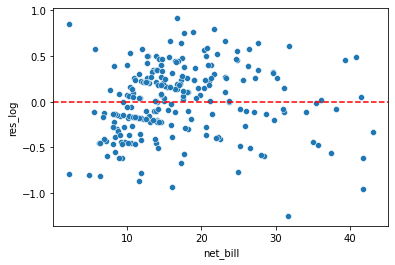

In [16]:
# Transformando o net_bill em um polinomio do segundo grau

# 2(modelo)

reg_tips = smf.ols('np.log(tip) ~ np.power(net_bill,2)', data = tips).fit()

tips['res_log'] = reg_tips.resid

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)

plt.axhline(y=0, color='r', linestyle='--')

reg_tips.summary()


In [ ]:

# 1(modelo) --> A transformações logaritmica apresentou: R-squared = 0.319

# 2(modelo) --> A transformações quadrática(polinomio do segundo grau) apresentou: R-squared = 0.250

# Melhor modelo: 1(modelo)


In [17]:
# item 5

reg_tips = smf.ols('tip ~ net_bill', data = tips).fit()

tips['r_escala_tip'] = reg_tips.resid

reg_tips.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           5.02e-23
Time:                        08:23:02   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# coef

# Eu creio que o modelo do item 5 apresenta um melhor coeficiente


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [18]:

prev_renda = pd.read_csv('M12_previsao_renda.csv').drop(['Unnamed: 0','data_ref','index'], 
                                                        axis = 1).dropna().drop_duplicates().reset_index(drop = True)

prev_renda.sexo = prev_renda.sexo.map({'M' : 0, 'F': 1})


In [19]:
# item 1

reg_linear = smf.ols('renda ~ tempo_emprego', data = prev_renda).fit()

reg_linear.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     1693.
Date:                Mon, 24 Jan 2022   Prob (F-statistic):               0.00
Time:                        08:23:45   Log-Likelihood:                -85557.
No. Observations:                8704   AIC:                         1.711e+05
Df Residuals:                    8702   BIC:                         1.711e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2572.9860     73.415     35.047      0.000    2429.076    2716.896
tempo_emprego   293.3767      7.130     41.149      0.000     279.401     307.352
==============================================================================
Omnibus:                     7161.051   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           322655.872
Skew:                           3.654   Prob(JB):                         0.00
Kurtosis:                      31.918   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# item 2

# R-squared = 0.163 -> função polinomial do primeiro grau(linear)

# R-squared = 0.177 -> função polinomial do segundo grau(quadratica)

# usaria a função polinomial do segundo grau para melhorar o modelo

res_func_quadratica = smf.ols('(renda) ~ np.power(tempo_emprego,2)', data = prev_renda).fit()

prev_renda['res_func_quadratica'] = res_func_quadratica.resid

res_func_quadratica.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     1877.
Date:                Mon, 24 Jan 2022   Prob (F-statistic):               0.00
Time:                        08:23:59   Log-Likelihood:                -85481.
No. Observations:                8704   AIC:                         1.710e+05
Df Residuals:                    8702   BIC:                         1.710e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3738.9421     54.238     68.936      0.000    3632.623    3845.261
np.power(tempo_emprego, 2)    10.4999      0.242     43.321      0.000      10.025      10.975
==============================================================================
Omnibus:                     6808.573   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           257898.522
Skew:                           3.436   Prob(JB):                         0.00
Kurtosis:                      28.766   Cond. No.                         254.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Variável categórica
As variáveis categóricas contêm um número finito de categorias ou grupos distintos. Os dados categóricos podem não ter uma ordem lógica. Por exemplo, os preditores categóricos incluem gênero, tipo de material e método de pagamento.

In [21]:
# item 3

# Transformando em dammys

prev_renda_dammy = prev_renda.copy()

prev_renda_dammy = pd.get_dummies(prev_renda_dammy[[
                                                    'sexo', 
                                                    'posse_de_veiculo', 
                                                    'posse_de_imovel', 
                                                    'qtd_filhos', 
                                                    'tipo_renda', 
                                                    'educacao', 
                                                    'estado_civil', 
                                                    'tipo_residencia', 
                                                    'idade', 
                                                    'tempo_emprego', 
                                                    'qt_pessoas_residencia', 
                                                    'mau', 
                                                    'renda']], 
                                  drop_first = True).rename(columns = {
                                                    'tipo_renda_Servidor público':'tipo_renda_Servidor_público', 
                                                    'educacao_Pós graduação':'educacao_Pós_graduação', 
                                                    'educacao_Superior completo':'educacao_Superior_completo', 
                                                    'educacao_Superior incompleto':'educacao_Superior_incompleto', 
                                                    'tipo_residencia_Com os pais':'tipo_residencia_Com_os_pais'})




In [22]:
# Calculando a Regressão Linear(função polinomial do primeiro grau)

reg_linear = smf.ols('''

                        renda ~ 
                        sexo + 
                        posse_de_veiculo + 
                        posse_de_imovel + 
                        qtd_filhos +
                        idade +
                        tempo_emprego + 
                        qt_pessoas_residencia + 
                        mau + 
                        tipo_renda_Bolsista + 
                        tipo_renda_Empresário + 
                        tipo_renda_Pensionista + 
                        tipo_renda_Servidor_público +
                        educacao_Pós_graduação +
                        educacao_Secundário +
                        educacao_Superior_completo +
                        educacao_Superior_incompleto +
                        estado_civil_Separado +
                        estado_civil_Solteiro +
                        estado_civil_União +
                        estado_civil_Viúvo +
                        tipo_residencia_Casa +
                        tipo_residencia_Com_os_pais +
                        tipo_residencia_Comunitário +
                        tipo_residencia_Estúdio +
                        tipo_residencia_Governamental
                        
                    '''
                     , data = prev_renda_dammy).fit()

reg_linear.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     101.7
Date:                Mon, 24 Jan 2022   Prob (F-statistic):               0.00
Time:                        08:24:13   Log-Likelihood:                -85212.
No. Observations:                8704   AIC:                         1.705e+05
Df Residuals:                    8678   BIC:                         1.707e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      2307.5309   2011.407      1.147      0.251   -1635.304    6250.366
posse_de_veiculo[T.True]       -130.3944    102.091     -1.277      0.202    -330.517      69.729
posse_de_imovel[T.True]         260.3779    100.582      2.589      0.010      63.213     457.542
mau[T.True]                      60.0706    313.383      0.192      0.848    -554.235     674.376
sexo                          -2417.7528    106.314    -22.742      0.000   -2626.154   -2209.351
qtd_filhos                     -282.6814    947.208     -0.298      0.765   -2139.434    1574.071
idade                            29.9671      5.793      5.173      0.000      18.611      41.323
tempo_emprego                   309.4355      7.422     41.692      0.000     294.887     323.984
qt_pessoas_residencia           348.8958    945.697      0.369      0.712   -1504.895    2202.686
tipo_renda_Bolsista           -1543.9176   2501.037     -0.617      0.537   -6446.544    3358.708
tipo_renda_Empresário          1037.7799    108.190      9.592      0.000     825.703    1249.857
tipo_renda_Pensionista         2397.5433   1961.419      1.222      0.222   -1447.303    6242.390
tipo_renda_Servidor_público     513.4587    158.528      3.239      0.001     202.707     824.211
educacao_Pós_graduação         1960.5693   1317.258      1.488      0.137    -621.569    4542.707
educacao_Secundário            -382.5728    542.197     -0.706      0.480   -1445.407     680.261
educacao_Superior_completo       78.5053    544.200      0.144      0.885    -988.257    1145.267
educacao_Superior_incompleto   -389.7404    582.852     -0.669      0.504   -1532.268     752.788
estado_civil_Separado           160.4906    967.124      0.166      0.868   -1735.303    2056.284
estado_civil_Solteiro           497.8104    951.745      0.523      0.601   -1367.836    2363.457
estado_civil_União              -28.4093    174.094     -0.163      0.870    -369.675     312.857
estado_civil_Viúvo              158.5752    995.513      0.159      0.873   -1792.867    2110.018
tipo_residencia_Casa           -481.5380    385.894     -1.248      0.212   -1237.983     274.907
tipo_residencia_Com_os_pais    -696.5152    436.569     -1.595      0.111   -1552.294     159.263
tipo_residencia_Comunitário    -723.8068    733.578     -0.987      0.324   -2161.794     714.180
tipo_residencia_Estúdio       -1045.7605    657.778     -1.590      0.112   -2335.161     243.640
tipo_residencia_Governamental -1116.0325    463.118     -2.410      0.016   -2023.853    -208.212
==============================================================================
Omnibus:                     7274.691   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           368229.604
Skew

In [23]:
# item 4

# Retirando as variaveis estatisticamente não significativa(s)

reg_linear = smf.ols('''

                        renda ~
                        sexo +
                        posse_de_imovel + 
                        idade +
                        tempo_emprego + 
                        tipo_renda_Empresário + 
                        tipo_renda_Servidor_público +
                        tipo_residencia_Governamental
                        
                    '''
                     , data = prev_renda_dammy).fit()

reg_linear.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     357.4
Date:                Mon, 24 Jan 2022   Prob (F-statistic):               0.00
Time:                        08:24:24   Log-Likelihood:                -85230.
No. Observations:                8704   AIC:                         1.705e+05
Df Residuals:                    8696   BIC:                         1.705e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      2387.7925    219.441     10.881      0.000    1957.637    2817.948
posse_de_imovel[T.True]         297.7742     98.886      3.011      0.003     103.934     491.614
sexo                          -2369.1258     98.656    -24.014      0.000   -2562.515   -2175.737
idade                            25.9590      5.297      4.901      0.000      15.576      36.342
tempo_emprego                   309.8711      7.398     41.883      0.000     295.368     324.374
tipo_renda_Empresário          1065.2291    107.659      9.894      0.000     854.192    1276.266
tipo_renda_Servidor_público     568.3589    157.527      3.608      0.000     259.569     877.149
tipo_residencia_Governamental  -637.8511    265.669     -2.401      0.016   -1158.625    -117.077
==============================================================================
Omnibus:                     7262.745   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           363074.895
Skew:                           3.697   Prob(JB):                         0.00
Kurtosis:                      33.764   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# R-squared = 0.241 --> regressão logaritmica (variavel renda)

# foi o melhor resultado que encontrei

reg_log = smf.ols('''

                        np.log(renda) ~
                        sexo +
                        posse_de_imovel + 
                        idade +
                        tempo_emprego + 
                        tipo_renda_Empresário + 
                        tipo_renda_Servidor_público +
                        tipo_residencia_Governamental 
                        
                    '''
                     , data = prev_renda_dammy).fit()

prev_renda_dammy['res_log'] = reg_log.resid

reg_log.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     394.6
Date:                Mon, 24 Jan 2022   Prob (F-statistic):               0.00
Time:                        08:24:30   Log-Likelihood:                -9261.5
No. Observations:                8704   AIC:                         1.854e+04
Df Residuals:                    8696   BIC:                         1.860e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         7.7660      0.036    218.480      0.000       7.696       7.836
posse_de_imovel[T.True]           0.0867      0.016      5.415      0.000       0.055       0.118
sexo                             -0.4893      0.016    -30.617      0.000      -0.521      -0.458
idade                             0.0050      0.001      5.778      0.000       0.003       0.007
tempo_emprego                     0.0491      0.001     40.981      0.000       0.047       0.051
tipo_renda_Empresário             0.1927      0.017     11.048      0.000       0.158       0.227
tipo_renda_Servidor_público       0.1172      0.026      4.592      0.000       0.067       0.167
tipo_residencia_Governamental    -0.0953      0.043     -2.214      0.027      -0.180      -0.011
==============================================================================
Omnibus:                        1.397   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                1.363
Skew:                          -0.017   Prob(JB):                        0.506
Kurtosis:                       3.051   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# item 5

def analise_residuo(var):

    sns.boxplot(x = var, y = 'res_log', data = prev_renda_dammy)

    plt.axhline(y=0, color='r', linestyle='--')


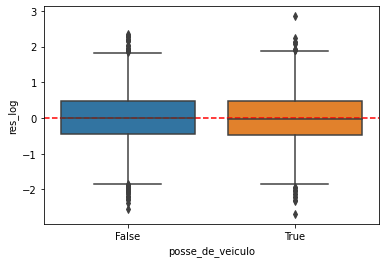

In [26]:

analise_residuo('posse_de_veiculo')



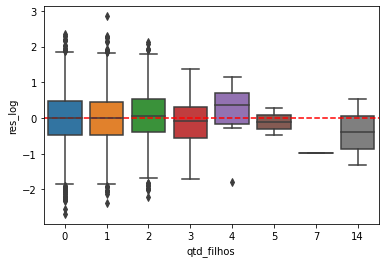

In [27]:

analise_residuo('qtd_filhos')


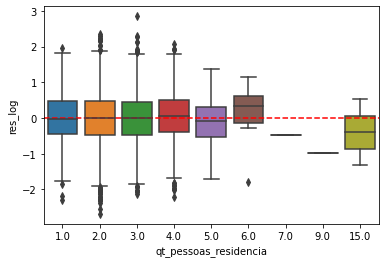

In [28]:

analise_residuo('qt_pessoas_residencia')


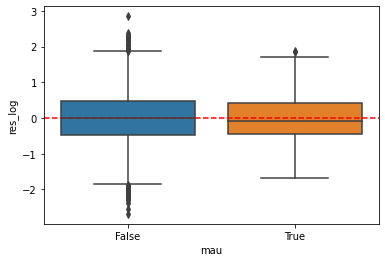

In [29]:

analise_residuo('mau')


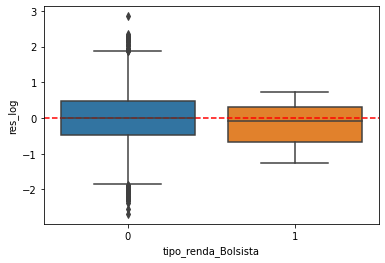

In [30]:

analise_residuo('tipo_renda_Bolsista')


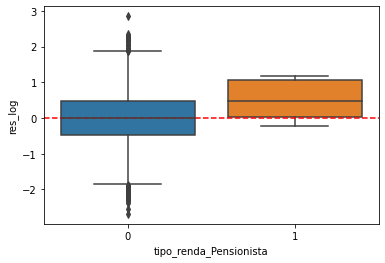

In [31]:

analise_residuo('tipo_renda_Pensionista')


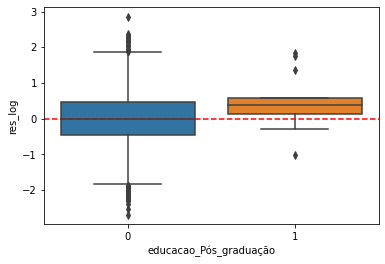

In [32]:

analise_residuo('educacao_Pós_graduação')


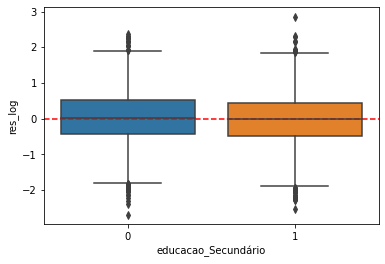

In [33]:

analise_residuo('educacao_Secundário')  


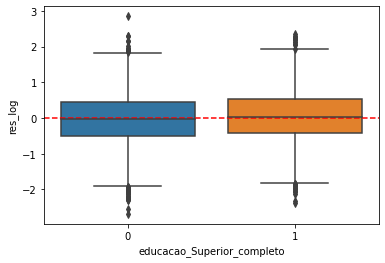

In [34]:

analise_residuo('educacao_Superior_completo')


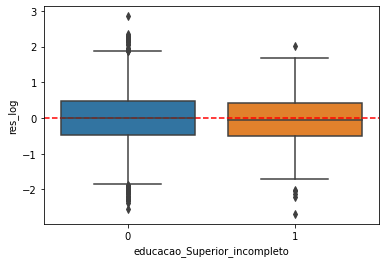

In [35]:

analise_residuo('educacao_Superior_incompleto')


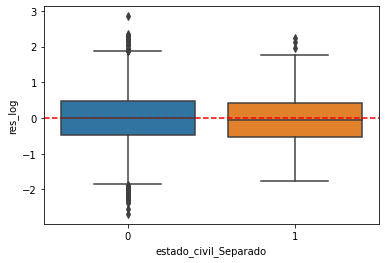

In [36]:

analise_residuo('estado_civil_Separado')


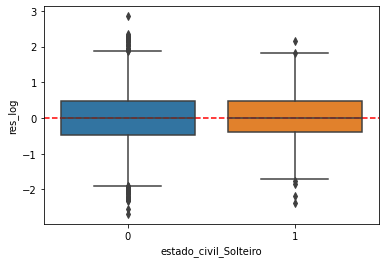

In [37]:

analise_residuo('estado_civil_Solteiro')


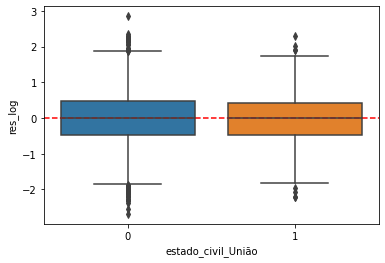

In [38]:

analise_residuo('estado_civil_União')


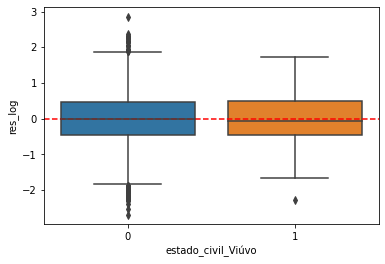

In [39]:

analise_residuo('estado_civil_Viúvo')


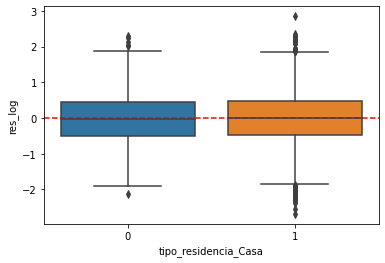

In [40]:

analise_residuo('tipo_residencia_Casa')


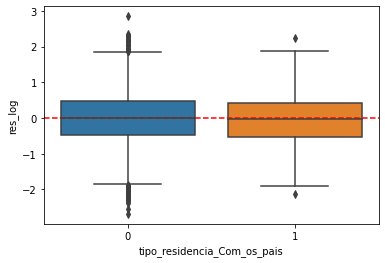

In [41]:

analise_residuo('tipo_residencia_Com_os_pais')


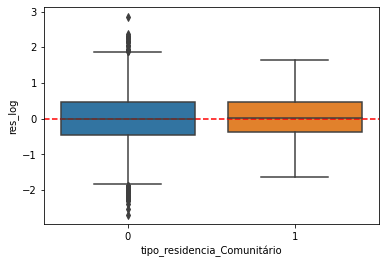

In [42]:

analise_residuo('tipo_residencia_Comunitário')


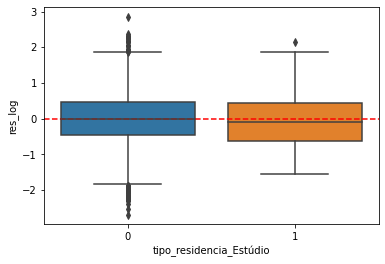

In [43]:

analise_residuo('tipo_residencia_Estúdio')
